In [1]:
%matplotlib inline 

import os
import glob
import sys
import numpy as np
import pandas as pd
from skimage import io 
import rasterio
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
sd_lst = np.array([])
sc_lst = np.array([])
pb_lst = np.array([])

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/batch_test/20170717_clipped.tif


/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


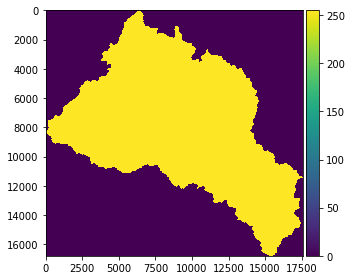

SystemExit: 

/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/'
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/batch_test'
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20180528_clipped.tif'
  
    
for f in sorted(glob.glob(os.path.join(path, '*.tif'))):
    print(f)
    raster = io.imread(f) #path
    # print("raster shape",raster.shape)

#     io.imshow(raster[:,:,0]) #snow depth, band1
#     io.show()

    io.imshow(raster[:,:,1]) #alpha mask, band2
    io.show()
    
    sys.exit()
    

    # convert to numpy array
    array = np.array(raster[:,:,0]) #RAW array of lidar tif
    # print("array shape",array.shape)
    
    plt.imshow(array) 
    plt.title('array')
    plt.colorbar()
    plt.show()

    array2 = np.array(raster[:,:,1])
    idx = array2>0
    
    plt.imshow(array[idx])
    plt.title('array indexed')
    plt.colorbar()
    plt.show()
    
    sys.exit()
    
    sno_mask = array.copy()
    sno_mask[sno_mask > 0] = 1 #make SCA mask
    
    plt.imshow(sno_mask[array2==255]) #,alpha=None)
    plt.title('Mask Layer (1=snow cover)')
    plt.colorbar()
    plt.show()  
    
 
               
    #Ernesto method....
    # a=array.copy()
    sno_mask = array.copy()
    idx = sno_mask > 0.001 #everything greater than 1mm of snow
#     sno_mask[idx] = 1   #set to one
    sno_mask[~idx] = np.nan #everything opposite of idx goes to nan
    print(sno_mask)
    print(idx)
    
#     sno_mask = np.where(array<0, np.nan)
#     sno_mask[sno_mask > 0] = 1 #make SCA mask
#     sno_mask = sno_mask.astype(int) #cast as int
    
#  #   ~~~IMSHOW~~~
    plt.imshow(sno_mask,alpha=None)
    plt.title('Mask Layer (1=snow cover)')
    plt.colorbar
    plt.show()

    # meanSD -- caclulate mean snow depth (meanSD), without zero snow pixels
#     mu_sd = np.mean(array[sno_mask][:]) #mean snow depth, from sca (SOME LIDAR HAVE NANS IN THE CLIPPED)
    mu_sd_m = np.nanmean(sno_mask[idx])
    print('masked mean', mu_sd_m)
    mu_sd_a = np.nanmean(array>.001)
    print('array mean',mu_sd_a)
#     print("mean snow depth", mu_sd,'meters')


#     # SCA -- pixs snow cover * pixel size
#     num_pix = np.nansum(sno_mask) #number of pixels with snow cover (sum the 1's)
# #     print("number pixels with snow cover",num_pix)
    
#     ras =  rasterio.open(f) #CHANGE FOR LOOP
#     gt = ras.transform
#     pixelSizeX = gt[0]
#     pixelSizeY =-gt[4] #notice the -gt
# #     print('pixel size (x,y) = ',pixelSizeX, pixelSizeY)

#     sca = num_pix * pixelSizeX * pixelSizeY
#     sca_km = sca/1000**2
#     p_basin = sca_km/1180 *100  #per Hedrick et al. 2018
# #     print('Snow Covered Area (SCA) = ', sca, 'm^2')
# #     print('Snow Covered Area (SCA) = ', sca_km, 'km^2')
# #     print('% Basin snow cover', p_basin, '%')
    
# #     array.close()
# #     sno_mask.close()
# #     ras.close()
#     sd_lst = np.append(sd_lst,mu_sd)
#     sc_lst = np.append(sc_lst,sca_km)
#     pb_lst = np.append(pb_lst,p_basin)


# df1 = pd.DataFrame(zip(sd_lst,sc_lst,pb_lst),columns = ['meanSD (m)','SCA (km)','% basin'])
# df1

    sys.exit()

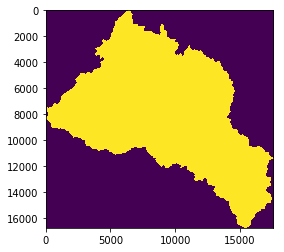

0.0 255.0
(16781, 17568) (16781, 17568)


In [16]:
array2 = np.array(raster[:,:,1])
plt.imshow(array2>0)
# plt.colorbar()
plt.show()
print(np.min(array2),np.max(array2))
print(array.shape,array2.shape)



# idx = array2>0
# plt.imshow(array[idx])
# plt.show()
# print(np.min(sno_mask))
# print(np.min())

mean sd array 0.19228159


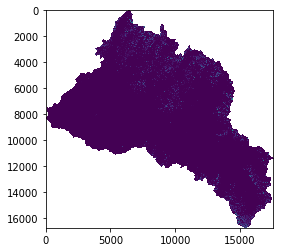

mean sd with mask 0.19228159


In [24]:
mu=np.nanmean(array)
print('mean sd array',mu)

mas = np.zeros_like(array2)
mas[array2==0]=1
mas=mas.astype(bool)
arr=array[mas]=np.nan
plt.imshow(array)
plt.show()
mu_mas=np.nanmean(array)
print('mean sd with mask',mu_mas)

rasterio.mask.mask(array2,)

In [ ]:
fig, a=plt.subplots(3,1)

a[0].plot(df1['meanSD (m)'])
a[1].plot(df1['SCA (km)'])
a[2].plot(df1['% basin'])

# sns.set_style('darkgrid')
# sns.set_style("ticks")
# sns.set_context('notebook')

In [ ]:
# mu_sd= []
# sca_km= []
# p_basin = []

# foo = [1,2,3]
# moo = [4,5,6]
# boo = [7,8,9]

# col=['f','m','b']
 
# # big_list = [(foo,moo,boo)]
# big_list = [(foo,moo,boo)]
# # print(big_list)

# # df1 = pd.DataFrame(big_list,columns=col)
# df1 = pd.DataFrame(zip(foo,moo,boo),columns=col)
# df1

